800 x 600：适合小型图表，例如散点图、柱状图等。  
1024 x 768：适合中型图表，例如折线图、面积图等。  
1280 x 800：适合大型图表，例如热力图、地图等。  
1920 x 1080：适合展示在高清屏幕上的图表，例如漏斗图、雷达图等。

In [2]:
wc = WC("""
作者头像
寒树Office与RPA
86篇文章
NLP快速入门：手把手教你用wordcloud做词云

关注作者
前往专栏
腾讯云
[618提前购]云产品限时特惠
立即抢购 >
备案控制台
开发者社区
学习
实践
活动
专区
工具
更多
文章/答案/技术大牛
搜索
写文章
提问
登录/注册
社区首页>专栏>寒树Office与RPA>正文
NLP快速入门：手把手教你用wordcloud做词云
发布于 2021-04-09 15:45:28
3.2K0
举报

导读：在上一章节介绍在Python环境下调用HanLP包进行分词的基础上，本文将介绍如何使用wordcloud绘制词云。尽管目前市面上已经有很多成熟的在线交互词云工具，但是考虑到实际工作中有很多内容是具有保密性的，无法直接在互联网上公开。因此，如何在本地搭建词云平台，自定义地绘制词云显得格外重要。


  让文字更好看——词云

1.词云图是一种用来展现高频关键词的可视化表达，通过文字、色彩、图形的搭配，产生具有冲击力的视觉效果，并传达有价值的信息。

2.词云是通过形成 "关键词云层" 或 "关键词渲染"，对文本中出现频率较高的关键词的视觉上的突出，词云图能过滤掉大量的文本信息，使用户只要一眼扫过文本就可以领略文本的主旨。

常用在线交互词云工具

1.微词云：https://www.weiciyun.com/



4.图悦：http://www.picdata.cn/picdata/index.php


6.美寄词云：https://www.moage.cn/wordart

wordcloud绘制词云

 wordcloud是python的一个三方库，称为词云也叫做文字云，是根据文本中的词频，对内容进行可视化的汇总，可以用来绘制用户画像。

1. 如何安装 wordcloud ？

 wordcloud的API总体来说并不多，且需要进行的配置并不复杂，适合新手上手。安装wordcloud可以使用python自带的pip工具来进行，本文使用的是python3.7，pip的版本是19.2.1。由于wordcloud依赖于numpy包、pillow包和matplotlib包，所以我们要先装好上述这三个包然后再装wordcloud包，安装命令如下：

pip install numpy==1.19.1pip install pillow==7.2.0
pip install matplotlib==3.3.2
pip install wordcloud==1.8.0
复制
2. 如何使用 wordcloud ？

 wordcloud库把词云当作一个 WordCloud 对象，所以使用wordcloud可以大致分为三个步骤（以英文为例）：

1.创建对象：wc= wordcloud.WordCloud()     2.加载文本：wc.generate("Choose a life of action, not one of oste-ntation.")     3.输出文件：wc.to_file("./picture/1.png")

‍

 如下图所示，一个简易、基本的词云便生成了。值得注意的是，生成的词云可以过滤掉停用词、介词、冠词等无意义的单词。


    此外， wordcloud库还有如下特点。
wordcloud.WordCloud( ) 代表一个文本对应的词云；
可以根据文本中词语出现的频率等参数绘制词云；
绘制词云的形状，尺寸和颜色都可以自定义设定。

    附上wordcloud内的配置参数


3. wordcloud 基础实战

       在本节，本文将介绍如何通过读取文本从而生成自定义式的词云，主要分为以下4步：

1.读取文本文件 （支持多种格式文本，包括word、excel、ppt等）     2.使用HanLP进行中文分词     3.使用wordcloud生成词云     4.显示/保存词云

 注：使用HanLP进行中文分词可以参考我们之前的文章。

《NLP快速入门：手把手教你用HanLP做中文分词》
寒树爱函数，公众号：寒树RPA与AINLP快速入门：手把手教你用HanLP做中文分词

       下面附上绘制简单中文词云的代码，分词的内容是十九大报告全文。

from PIL import Image
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import numpy as np

wc = WordCloud(background_color="white",# 设置背景颜色
           max_words=2000, # 词云显示的最大词数
           height=400, # 图片高度
           width=800, # 图片宽度
           max_font_size=50, #最大字体     
           stopwords=stopwords, # 设置停用词
           font_path='C:/Windows/Fonts/simhei.ttf', # 兼容中文字体，不然中文会显示乱码
           )
# 生成词云 
wc.generate(text) # 此处的text便是分好词的19大文本

# 生成的词云图像保存到本地
wc.to_file(path.join(d, "Images//19da.png"))

# 显示图像
plt.imshow(wc, interpolation='bilinear')
# interpolation='bilinear' 表示插值方法为双线性插值
plt.axis("off")# 关掉图像的坐标
plt.show()
复制
       绘制的词云如下所示。


4. wordcloud 高级实战

       在本节，本文将介绍如何将词云绘制在预设定好的背景图片上。例如：以我们最熟悉的中国地图为背景，我们将在此基础上绘制词云，只需修改wordcloud里的“mask”属性值，详细代码如下所示。

from PIL import Image
from wordcloud import wordcloud
import matplotlib.pyplot as plt
import numpy as np

wc = WordCloud(background_color="white",# 设置背景颜色
           max_words=2000, # 词云显示的最大词数
           max_font_size=60, #最大字体     
           stopwords=stopwords, # 设置停用词
           mask=np.array(Image.open("./picture/china.jpg")), # 选择背景图片为中国地图
           font_path='C:/Windows/Fonts/simhei.ttf', # 兼容中文字体，不然中文会显示乱码
           )
# 生成词云 
wc.generate(text) # 此处的text便是分好词的女排评论文本

# 生成的词云图像保存到本地
wc.to_file(path.join(d, "Images//nvpai.png"))

# 显示图像
plt.imshow(wc, interpolation='bilinear')
# interpolation='bilinear' 表示插值方法为双线性插值
plt.axis("off")# 关掉图像的坐标
plt.show()
复制
  绘制的词云如下所示。


文章分享自微信公众号：
寒树Office与RPA
寒树Office与RPA
扫码关注公众号

本文参与 腾讯云自媒体分享计划，欢迎热爱写作的你一起参与！
原始发表：2021-03-23，如有侵权请联系 cloudcommunity@tencent.com 删除

python
https
NLP 服务
网络安全
登录后参与评论
相关文章
【干货合集】深度学习入门与实战
近年来，深度学习的概念十分火热，人工智能也由于这一技术的兴起，在近几年吸引了越来越多的关注。本文精选了分享在腾云阁技术社区深受开发者欢迎的深度学习的文章，轻松快速带你入门深度学习。
2017-10-18
1.8K
【深度学习Deep Learning】资料大全
　　最近在学深度学习相关的东西，在网上搜集到了一些不错的资料，现在汇总一下： Free Online Books Deep Learning66 by Yoshua Bengio, Ian Goodfellow and Aaron Courville Neural Networks and Deep Learning42 by Michael Nielsen Deep Learning27 by Microsoft Research Deep Learning Tutorial23 by LISA lab,
2018-01-09
1.9K
【机器学习Machine Learning】资料大全
　　昨天总结了深度学习的资料，今天把机器学习的资料也总结一下(友情提示：有些网站需要"科学上网"^_^) 　　推荐几本好书： 1.Pattern Recognition and Machine Learning (by Hastie, Tibshirani, and Friedman's ) 2.Elements of Statistical Learning(by Bishop's) 　　这两本是英文的,但是非常全，第一本需要有一定的数学基础，第可以先看第二本。如果看英文觉得吃力，推荐看一下下面几本英文书
2018-01-09
3.1K
我分析了《用商业案例学R语言数据挖掘》书评，告诉你R有多火
r 语言
数据挖掘
商业智能时代已经全面到来，分析型人才的岗位数量在就业市场中呈现井喷式的增长。无论从事产品研发的工程师，还是从事产品推广的市场人员、人力资源的财务会计人员，都需要掌握数据分析技术，否则很有可能被人工智能时代替代。 “工欲善其事，必先利其器”。当前，R和Python等开源软件方兴未艾，但是这类软件学习曲线缓慢，使很多初学者的热情在进入数据分析的核心领域之前就消失殆尽。而商业数据分析的真正目的是为了解决业务分析需求，构建稳健的数据挖掘模型。因此能否以案例的形式带领我们快读进入数据分析和编程领域领域的资源显得尤为珍
CDA数据分析师
2018-02-11
7110
学习资料参考：从深度学习到自然语言处理
深度学习
NLP 服务
注意：本文已经更新，新版结合深度学习简介和发展历程，给出了更详尽的学习资料参考。新版链接：深度学习简介与学习资料参考（http://peteryuan.net/deep-learning-intro/） 本文主要介绍一些与神经网络和自然语言处理相关的经典教程、资料，以便初学者能有个比较清晰的学习参考。 从机器学习到深度学习 深度学习脱胎于神经网络，而神经网络又是一种机器学习的经典算法。因此，如果希望从理论上更深刻地掌握深度学习，建议了解相关的机器学习知识。 机器学习 Andrew Ng.（吴恩达）的机器学习
用户1332428
2018-03-09
5500
详细步骤：用R语言做文本挖掘
其他
目录 Part1 安装依赖包 Part2 分词处理 Part3文本聚类 Part4 文本分类 Part5情感分析 Part1 安装依赖包 R语言中中文分析的软件包是Rwordseg，Rwordseg软件包依赖rJava包，rJava需要本机中有安装Java。 由于微信公众号发布文章字数限制，，此部分详细内容，及软件下载网址，请 Part2 分词处理 在RStudio中安装完相关软件包之后，才能做相关分词处理，请参照Part1部分安装需要软件包。 1. RWordseg功能 分词 > se
机器学习AI算法工程
2018-03-13
3.6K0
文本挖掘：手把手教你分析携程网评论数据
其他
作者：飘雪 http://www.itongji.cn/cms/article/articledetails?articleid=1114 中文文本挖掘包tm、tmcn、Rwordseg、Rweibo的安装 http://blog.csdn.net/andy_henry/article/details/25929019 文本分析的应用越来越广泛，这不，我的工作也开始涉及了文本分析，今天就讲讲关于评论数据的那点事。 首先评论数据如何获取？ 一般通过网络爬虫的方式抓取各大网站的评论数据，本次分析数据就来源于携
机器学习AI算法工程
2018-03-13
7650
用R进行网站评论文本挖掘聚类
java
对于非结构化的网站中文评论信息，r的中文词频包可能是用来挖掘其潜在信息的好工具，要分析文本内容，最常见的分析方法是提取文本中的词语，并统计频率。频率能反映词语在文本中的重要性，一般越重要的词语，在文本中出现的次数就会越多。词语提取后，还可以做成词云，让词语的频率属性可视化，更加直观清晰。 比如对于如下的网站评论信息： ? 通过一系列的文本处理和高频词汇的提取，最后结合聚类，我们可以得到如下的可视化结果。 第一类客户： ? 第二类 ? 第三类 ? 这是根据某网站成交评论制作的可视化词云，词频的统计，分词和词
机器学习AI算法工程
2018-03-14
9540
python爬取网易云音乐并分析：用户有什么样的音乐偏好？
python
爬虫
selenium
anaconda
https
发现自己有时候比挖掘别人来的更加有意义，自己到底喜欢谁的歌，自己真的知道么？习惯不会骗你。 搭建爬虫环境 1.安装selenium pip install selenium # anaconda环境的可用conda install selenium # 网速不好的可用到https://pypi.python.org/pypi/selenium下载压缩包，解压后使用python setup.py install 2.安装Phantomjs Mac版本 步骤一下载包：去这里下载对应版本http://pha
机器学习AI算法工程
2018-03-15
4.8K1
用R进行文本分析初探——包含导入词库和和导入李白语句
其他
用R进行文本分析初探——以《红楼梦》为例 一.写在前面的话~ 　　刚吃饭的时候同学问我，你为什么要用R做文本分析，你不是应该用R建模么，在我和她解释了一会儿后，她嘱咐我好好写这篇博文，嗯为了娟儿同学，细细说一会儿文本分析。 文本数据挖掘(Text Mining)是指从文本数据中抽取有价值的信息和知识的计算机处理技术。顾名思义，文本数据挖掘是从文本中进行数据挖掘(Data Mining)。从这个意义上讲，文本数据挖掘是数据挖掘的一个分支。 文本分析是指对文本的表示及其特征项的选取；文本分析是文本挖掘、信息
学到老
2018-03-19
1.5K1
干货分享 | 自然语言处理及词向量模型介绍（附PPT）
NLP 服务
机器学习
编程算法
云脑科技机器学习训练营第二期，对自然语言处理及词向量模型进行了详细介绍，量子位作为合作媒体为大家带来本期干货分享~ 本期讲师简介 ? 樊向军 云脑科技核心算法工程师，清华大学学士，日本东京大学与美国华盛顿州立大学双硕士 第33届亚洲、国际物理奥赛双料金牌得主，在美国硅谷高通等公司有着多年超高性能计算仿真软件设计开发经验，获得高通Qualstar Diamond杰出贡献奖，目前作为云脑科技算法团队的主要成员进行金融、通信、能源大数据领域的核心人工智能算法研发与系统设计工作。 分享内容实录 自然语言处理Natu
量子位
2018-03-23
1.2K0
基于微博数据用 Python 打造一颗“心”
python
numpy
matlab
一年一度的虐狗节终于过去了，朋友圈各种晒，晒自拍，晒娃，晒美食，秀恩爱的。程序员在晒什么，程序员在加班。但是礼物还是少不了的，送什么好？作为程序员，我准备了一份特别的礼物，用以往发的微博数据打造一颗“爱心”，我想她一定会感动得哭了吧。哈哈 ? 准备工作 有了想法之后就开始行动了，自然最先想到的就是用 Python 了，大体思路就是把微博数据爬下来，数据经过清洗加工后再进行分词处理，处理后的数据交给词云工具，配合科学计算工具和绘图工具制作成图像出来，涉及到的工具包有： requests 用于网络请求爬取微博数
码云Gitee
2018-03-29
5610
TensorFlow 全网最全学习资料汇总之TensorFlow的技术应用【4】
tensorflow
人工智能
深度学习
图像识别
【AI研习社】关注AI前沿、开发技巧及技术教程等方面的内容。欢迎技术开发类文章、视频教程等内容投稿，邮件发送至：zhangxian@leiphone.com 随着谷歌2015年发布开源人工系统TensorFlow，让本就如火如荼的深度学习再添一把火，截至现在，TensorFlow已经历了多个版本演进，功能不断完善，AI开发者也能灵活自如的运用TensorFlow解决一些实际问题，下面雷锋网会对一些比较实用的TensorFlow应用做相关整理，让大家对TensorFlow有理性和感性的双层认知。 Tensor
AI研习社
2018-03-29
7080
5W字入门干货：手把手教你用机器学习做金融交易（下）
人工智能
机器学习
作者：江海 高能物理专业博士 量子位 已获授权编辑发布 欢迎回来 上接手把手教你用机器学习做金融交易（上） 2.4 Classification 接下来我们要介绍的就是Classification了。 classification跟regression的区别就是Y的类型不同，regression是Y的具体数值的预测，比如涨跌幅度，而classification是对于单纯分类的预测，比如Y的涨(Y值取1)或者跌(Y值取0)。 但是classification里面有一个地方不好处理，那就是如果想要预测的Y不仅仅
量子位
2018-03-29
6930
5W字入门干货：手把手教你用机器学习做金融交易（上）
机器学习
人工智能
作者：江海 高能物理专业博士 量子位 已获授权编辑发布 这是一篇长达5W字的干货。 作者用诙谐的笔触讲述了用机器学习入门金融领域的正确姿势，基本涵盖了基础机器学习的方法及具体应用，还有部分期权的科普。文风清奇，也哲思满满。 原文标题为《教你Machine Learning玩转金融入门notes》，内容分为三部分： 一. 金融和统计背景介绍 二. Machine Learning各个方法和在trading上的应用 2.1 Supervised Learning: Regressions 2.2 Non-Par
量子位
2018-03-29
7140
机器学习&人工智能博文链接汇总
机器学习
人工智能
tensorflow
深度学习
强化学习
? 争取每天更新 ? 126 ? ---- 蜗牛的历程： [入门问题] [机器学习] [聊天机器人] [好玩儿的人工智能应用实例] [TensorFlow] [深度学习] [强化学习] [神经网络] [自然语言处理] [数据科学] [Python] [Java] [机器学习－－初期的笔记] [学习路线] [软件安装] [面试] [读论文] ---- 入门问题 简单粗暴地入门机器学习 机器学习的技术栈及应用实例脑洞 深度学习相关最新图书推荐 机器学习 ? [K
杨熹
2018-04-02
6980
机器学习(Machine Learning)&深度学习(Deep Learning)资料(Chapter 1)
其他
机器学习(Machine Learning)&深度学习(Deep Learning)资料(Chapter 1) 注:机器学习资料篇目一共500条,篇目二开始更新 希望转载的朋友，你可以不用联系我．但是一定要保留原文链接，因为这个项目还在继续也在不定期更新．希望看到文章的朋友能够学到更多．此外:某些资料在中国访问需要梯子. 《Brief History of Machine Learning》 介绍:这是一篇介绍机器学习历史的文章，介绍很全面，从感知机、神经网络、决策树、SVM、Adaboost到随机森林、D
Albert陈凯
2018-04-04
1.7K0
AI 经典书单 | 人工智能学习该读哪些书
人工智能
编程算法
深度学习
? 本文转自网络，如涉侵权请及时联系我们 人工智能相关岗位中，涉及到的内容包含： 算法、深度学习、机器学习、自然语言处理、数据结构、Tensorflow、Python 、数据挖掘、搜索开发、神经网络、视觉度量、图像识别、语音识别、推荐系统、系统算法、图像算法、数据分析、概率编程、计算机数学、数据仓库、建模等关键词，基本涵盖了现阶段人工智能细分领域的人才结构。 将上面的岗位涉及到的知识和技术划类，就形成了今天的五份书单： 1人工智能科普类：人工智能科普、人工智能哲学 ? 《智能的本质》斯坦福、伯克利客座教
CDA数据分析师
2018-04-08
7690
【专知荟萃】人工智能领域26个主题知识资料全集（入门/进阶/论文/综述/视频/专家等）
人工智能
【导读】主题荟萃知识是专知的核心功能之一，为用户提供AI领域系统性的知识学习服务。主题荟萃为用户提供全网关于该主题的精华（Awesome）知识资料收录整理，使得AI从业者便捷学习和解决工作问题！在专知人工智能主题知识树基础上，主题荟萃由专业人工编辑和算法工具辅助协作完成，并保持动态更新！另外欢迎对此创作主题荟萃感兴趣的同学，请加入我们专知AI创作者计划，共创共赢！专知为大家呈送专知主题荟萃知识资料大全集荟萃 （入门/进阶/综述/视频/代码/专家等），请大家查看！专知访问www.zhuanzhi.ai, 或
WZEARW
2018-04-08
1.6K0
【资料分享】500篇干货解读人工智能新时代
人工智能
500篇干货解读人工智能新时代 本文主要目的是为了分享一些机器学习以及深度学习的资料供大家参考学习，整理了大约500份国内外优秀的材料文章，打破一些学习人工智能领域没头绪同学的学习禁锢，希望看到文章的朋友能够学到更多，此外:某些资料在中国访问需要梯子，希望在一定程度上能够帮助到大家，喜欢的朋友一定要点赞关注博主，转载别忘了保留原文链接哦~~~ 《Brief History of Machine Learning》 介绍:这是一篇介绍机器学习历史的文章，介绍很全面，从感知机、神经网络、决策树、SVM、Adab
Angel_Kitty
2018-04-08
1.5K0
【专知-PyTorch手把手深度学习教程05】Dropout快速理解与PyTorch实现: 图文+代码
pytorch
深度学习
人工智能
机器学习
【导读】主题链路知识是我们专知的核心功能之一，为用户提供AI领域系统性的知识学习服务，一站式学习人工智能的知识，包含人工智能（ 机器学习、自然语言处理、计算机视觉等）、大数据、编程语言、系统架构。使用请访问专知 进行主题搜索查看 - 桌面电脑访问www.zhuanzhi.ai, 手机端访问www.zhuanzhi.ai 或关注微信公众号后台回复" 专知"进入专知，搜索主题查看。值国庆佳节，专知特别推出独家特刊-来自中科院自动化所专知小组博士生huaiwen和Kun创作的-PyTorch教程学习系列, 今日
WZEARW
2018-04-09
2.8K0
【干货荟萃】机器学习&深度学习知识资料大全集(一)（论文/教程/代码/书籍/数据/课程等）
机器学习
深度学习
人工智能
github
点击上方“专知”关注获取更多AI知识! 【导读】转载来自ty4z2008（GItHub）整理的机器学习&深度学习知识资料大全荟萃，包含各种论文、代码、视频、书籍、文章、数据等等。是学习机器学习和深度学习的必备品！ ty4z2008前言：希望转载的朋友，你可以不用联系我．但是一定要保留原文链接，因为这个项目还在继续也在不定期更新．希望看到文章的朋友能够学到更多．此外:某些资料在中国访问需要梯子. 《Brief History of Machine Learning》 http://www.erogol.com
WZEARW
2018-04-09
2K0
【专知荟萃16】主题模型Topic Model知识资料全集（基础/进阶/论文/综述/代码/专家，附PDF下载）
其他
Topic model 主题模型 专知荟萃 基础入门 进阶论文 更多Papers推荐 一些主题模型的应用场景 Papers for NLP Papers for opinion mining Papers for retrieval Papers for information extraction Tutorials 综述 视频教程 代码 领域专家 基础入门 中英文博客以及基础文章 Topic model 介绍 简介：简要了解主题模型是什么意思，最基本的概念https://en.wikipedia.org
WZEARW
2018-04-10
2.3K0
学习使用Jieba1.Jieba2. 特点3.功能4.安装5.使用6.其他中文分词工具
编程算法
中文分词
NLP 服务
搜索引擎
python
1.Jieba 相信大多数知道NLP的人都知道什么是Jieba，但对于像我这样的新手而言，也仅限于知道而已，并没有学习过它，使用过它，打算用几天的时间来记录自己学习、使用Jieba的过程。 jieba是一款开源的中文分词工具 github ，“结巴”中文分词：做最好的 Python 中文分词组件 "Jieba" (Chinese for "to stutter") Chinese text segmentation: built to be the best Python Chinese word s
JasonhavenDai
2018-04-11
9540
[编程经验] 拉勾网爬虫数据的后续处理
爬虫
NLP 服务
深度学习
编程算法
上一篇我们介绍了如何爬拉勾的数据，这次介绍一下如何分析爬下来的数据，本文以自然语言处理这个岗位为例。 上次那个爬虫的代码有一点问题，不知道大家发现没有，反正也没有人给我说。。然后后面我把我最后改好的代码附在本文的最后。 本文主要分析的是岗位职责和岗位要求，基本思路是先分词，然后统计词频，最后最词云展示出来。先看下效果 从这个图可以看出来，自然语言处理大多数需要掌握深度学习，需要用深度学习去解决问题，然后是工作经验，项目经验，以及对算法的理解。 首先分词，要正确分词，需要有一份高质量的词典，因为在岗位
用户1622570
2018-04-11
1.6K0
Python数据抓取与可视化实战——网易云课堂人工智能与大数据板块课程实战
python
爬虫
本篇内容数据抓取对象为网易云课堂人工智能与大数据板块课程信息，使用的工具是urllib+postman，因为直接构建的POST抓取的josn数据包，所以数据抓取的代码非常简单，没有繁杂的xpath或者css表达式。可视化部分使用matplotlib，感谢刘顺祥大神的matplotlib教程系列，让我没怎么费力气就直接复用了大量代码！ https://mp.weixin.qq.com/s/E_r5ZsV9HOyuhnFwqsRXeA 以下是数据抓取部分代码： import json,time from url
数据小磨坊
2018-04-11
9010
[情人节] jieba分词介绍
python
NLP 服务
jieba 分词我觉得是Python中文分词工具中最好用的一个工具包。想要入门自然语言处理，jieba分词有必要好好掌握一下，今天带大家入门一下jieba分词包。 首先简单介绍一下jieba分词的原理，jieba分词采用的是基于统计的分词方法，首先给定大量已经分好词的文本，利用机器学习的方法，学习分词规律，然后保存训练好的模型，从而实现对新的文本的分词。主要的统计模型有：N元文法模型N-gram，隐马尔可夫模型HMM，最大熵模型ME，条件随机场模型CRF等。 jieba分词包含三个主要的类，分别是jie
用户1622570
2018-04-12
1.5K0
【干货】主题模型如何帮助法律部门提取PDF摘要及可视化（附代码）
其他
【导读】本文是Oguejiofor Chibueze于1月25日发布的一篇实用向博文，详细介绍了如何将主题模型应用于法律部门。文章中，作者分析了律师在浏览大量的法律文件的时候可以通过文档摘要进行快速了解。基于此需求，作者提出一系列步骤：将从PDF文档中提取文本、清洗文本、对文本进行主题建模、主题摘要及可视化。本文简洁、实用，如果你想基于主题模型做点实用的东西，那你就来对地方了！专知内容组进行编辑整理。 ? NLP For Topic Modeling & Summarization Of Legal Doc
WZEARW
2018-04-12
1K0
用 Python 解读十九大工作报告
python
数据分析
增强改革创新本领，保持锐意进取的精神风貌，善于结合实际创造性推动工作，善于运用互联网技术和信息化手段开展工作。 在中国共产党第十九次全国代表大会开幕会上，习近平总书记代表十八届中央委员会向大会作报告。报告全文3万多字，讲话时长3个多小时。 各路媒体已经从多角度梳理、总结了报告的内容。 既然报告中提及到，善于运用互联网技术和信息化手段开展工作。那么我们就用 Python 来分析下报告里的高频关键词，看看什么才是我们需要关注的重点。 对于报告全文进行分词处理，再对词频进行统计，得到以下两张图： ? ? 从数据中
Crossin先生
2018-04-17
5530
【编程课堂】词云 wordcloud
python
本周为大家带来炫酷好玩的 wordcloud 词云构造库。 使用 wordcloud 可以做出这样的图片： ? 还可以做出这样的： ? 接下来，我们来学习如何制作属于自己的词云图。 本来想说一句，安装过程不表，直接进入正题，可是在编程教室的QQ群和微信群中都有人遇到 wordcloud 安装失败的问题。 所以在此简单提一下安装过程： 当然最直接的是 pip pip install wordcloud 但很多同学会发现直接 pip 是会报错的，所以这里提供第二种安装方式： 下载 whl 手动安装包：http:
Crossin先生
2018-04-17
9810
用R进行文本分析初探——以《红楼梦》为例
r 语言
数据分析
数据挖掘
一.写在前面的话~ 　　刚吃饭的时候同学问我，你为什么要用R做文本分析，你不是应该用R建模么，在我和她解释了一会儿后，她嘱咐我好好写这篇博文，嗯为了娟儿同学，细细说一会儿文本分析。 文本数据挖掘(Text Mining)是指从文本数据中抽取有价值的信息和知识的计算机处理技术。顾名思义，文本数据挖掘是从文本中进行数据挖掘(Data Mining)。从这个意义上讲，文本数据挖掘是数据挖掘的一个分支。 文本分析是指对文本的表示及其特征项的选取；文本分析是文本挖掘、信息检索的一个基本问题，它把从文本中抽取出的特征词
小莹莹
2018-04-24
1.4K0
中文文本相似度计算工具集
人工智能
机器学习
深度学习
作者 | fendouai 编辑 | 磐石 出品 | 磐创AI技术团队 ---- 【磐创AI导读】：前两篇文章中我们介绍了一些机器学习不错的项目合集和深度学习入门资源合集，本篇文章将对中文文本相似度计算工具做一次汇总。喜欢我们文章的小伙伴，欢迎大家点击上方蓝字关注我们的公众号：磐创AI。另外您对我们的文章有任何的意见或是文章中的不足之处，欢迎在文末留言。 一． 基本工具集 1. 分词工具 jieba 结巴中文分词 https://github.com/fxsjy/jieba HanLP 自然语言处理 中
磐创AI
2018-04-24
2.2K0
【工具】手把手教你用R制作词云
r 语言
📷 看着别人做的词云，觉得做设计素材特别好，就在网上扒拉一下，看有没有合适大众一起玩的工具，公认为国外的tagxedo制作词云是最简洁方便和模板最多的。点击tagxedo ，不过因为是国外网站，访问外国网站是必须的。 国内软件做词云篇 嫌访问外国网站麻烦的，且会用PS的，建议用国内的图悦，优点就是不用访问外国网站，能随便扒拉一篇文章做出词云，缺点是必须自己设计词云样式，没有模板可套用，会PS的可以很容易完成。小编表示这个就适合咱这种不愿访问外国网站，且能玩得动PS的人，呵呵… 第一步
小莹莹
2018-04-25
9910
基于Python实现的微信好友数据分析
python
微信
NLP 服务
本文转自微信公号5厘米的理想 作者 | 飞鸿踏雪 最近微信迎来了一次重要的更新，允许用户对”发现”页面进行定制。不知道从什么时候开始，微信朋友圈变得越来越复杂，当越来越多的人选择”仅展示最近三天的朋友圈”，大概连微信官方都是一脸的无可奈何。逐步泛化的好友关系，让微信从熟人社交逐渐过渡到陌生人社交，而朋友圈里亦真亦幻的状态更新，仿佛在努力证明每一个个体的”有趣”。 有人选择在朋友圈里记录生活的点滴，有人选择在朋友圈里展示观点的异同，可归根到底，人们无时无刻不在窥探着别人的生活，唯独怕别人过多地了解自己的生
AI科技大本营
2018-04-26
8530
Python数据挖掘：WordCloud词云配置过程及词频分析
python
数据可视化
豌豆贴心提醒，本文阅读时间5分钟 这篇文章是学习了老曹的微信直播，感觉WordCloud对我的《Python数据挖掘课程》非常有帮助，希望这篇基础文章对你有所帮助，同时自己也是词云的初学者，强烈推荐老曹的博客供大家学习。如果文章中存在不足或错误的地方，还请海涵~ 一. 安装WordCloud 在使用WordCloud词云之前，需要使用pip安装相应的包。 pip install WordCloud pip install jieba
小小科
2018-05-02
1.2K0
小白用Python | 十分钟学会用任意中文文本生成词云
其他
前述 本文需要的两个Python类库 jieba:中文分词分词工具 wordcloud:Python下的词云生成工具 写作本篇文章用时一个小时半,阅读需要十分钟,读完该文章后你将学会如何将任意中文文本生成词云。 代码组成 代码部分来源于其他人的博客,但是因为bug或者运行效率的原因,我对代码进行了较大的改变 代码第一部分,设置代码运行需要的大部分参数,你可以方便的直接使用该代码而不需要进行过多的修改 第二部分为jieba的一些设置,当然你也可以利用isCN参数取消中文分词 第三部分,wordc
小小科
2018-05-02
8610
Python 爬虫实践：《战狼2》豆瓣影评分析
python
爬虫
https
html
来源：hang segmentfault.com/a/1190000010473819 简介 刚接触python不久，做一个小项目来练练手。前几天看了《战狼2》，发现它在最新上映的电影里面是排行第一的，如下图所示。准备把豆瓣上对它的影评做一个分析。 目标总览 主要做了三件事： 抓取网页数据 清理数据 用词云进行展示 使用的python版本是3.5. 一、抓取网页数据 第一步要对网页进行访问，python中使用的是urllib库。代码如下： from urllib import request res
小小科
2018-05-02
8030
基于Python实现的微信好友数据分析
python
微信
源 / 数盟 最近微信迎来了一次重要的更新，允许用户对”发现”页面进行定制。不知道从什么时候开始，微信朋友圈变得越来越复杂，当越来越多的人选择”仅展示最近三天的朋友圈”，大概连微信官方都是一脸的无可奈何。逐步泛化的好友关系，让微信从熟人社交逐渐过渡到陌生人社交，而朋友圈里亦真亦幻的状态更新，仿佛在努力证明每一个个体的”有趣”。 有人选择在朋友圈里记录生活的点滴，有人选择在朋友圈里展示观点的异同，可归根到底，人们无时无刻不在窥探着别人的生活，唯独怕别人过多地了解自己的生活。人性中交织着的光明与黑暗，像一只
顶级程序员
2018-05-03
8690
业界 | Facebook发布新版fastText：拓展至移动端，加入教程
深度学习
开源
人工智能
选自code.facebook 机器之心编译 参与：李泽南 fastText 是 Facebook 开发的一款快速文本分类器，提供简单而高效的文本分类和表征学习的方法，性能比肩深度学习而且速度更快。Facebook 在此前的研究中宣称人们可以使用一个标准多核 CPU 在十分钟内完成 fastText 上 10 亿多词的训练，并在一分钟内将 50 万个句子分成 31.2 万个类别。去年 8 月，Facebook 将这一技术开源。 昨天，Facebook 人工智能研究院（FAIR）进一步拓展了 fastText
机器之心
2018-05-08
8950
灵魂追问 | 教程那么多，你……看完了吗？
人工智能
机器学习
强化学习
编程算法
机器之心整理 参与：路雪、蒋思源 2017年，人工智能技术出现了很多新的技术和发展，在这一年中机器之心发布了很多教程类文章，有适合入门学习者的，有适合已经具备专业知识和实践经验的从业者的；有关于语言的，有关于框架的，有关于硬件配置的，甚至还有关于猫片、漫画的…… 教程那么多，你……看完了吗？ 本文对这一年来机器之心发布的教程进行总结，共分为 What 和 How 两大部分，在两大板块下又进行细分，目录如下： What 概念 机器学习基础 深度模型基础 强化学习基础 数学 How
机器之心
2018-05-10
1.7K0
点击加载更多
关于作者
寒树Office与RPA
86
文章
91K
累计阅读量
240
获赞
4488
作者排名
关注
前往专栏
社区活动
有奖征文丨玩转Cloud Studio
参与活动，赢取限量周边礼品
立即参加
邀请好友加入自媒体分享计划
邀请好友，同享奖励 30 / 100 / 180 元云服务器代金券
立即邀请
精选专题
腾讯云原生专题
云原生技术干货，业务实践落地。
广告
相关产品与服务
NLP 服务
全面综合、开箱即用的 NLP 能力
关注 - 腾讯云 开发者 公众号
将获得
10元无门槛代金券
洞察腾讯核心技术
剖析业界实践案例
扫码关注腾讯云开发者
4
NEW
切换旧版
领券
社区
专栏文章
阅读清单
互动问答
技术沙龙
技术视频
团队主页
腾讯云TI平台
活动
自媒体分享计划
邀请作者入驻
自荐上首页
技术竞赛
资源
技术周刊
社区标签
开发者手册
开发者实验室
关于
社区规范
免责声明
联系我们
友情链接
腾讯云开发者
扫码关注腾讯云开发者
扫码关注腾讯云开发者

领取腾讯云代金券

热门产品
域名注册云服务器区块链服务消息队列网络加速云数据库域名解析云存储视频直播
热门推荐
人脸识别腾讯会议企业云CDN加速视频通话图像分析MySQL 数据库SSL 证书语音识别
更多推荐
数据安全负载均衡短信文字识别云点播商标注册小程序开发网站监控数据迁移
Copyright © 2013 - 2023 Tencent Cloud. All Rights Reserved. 腾讯云 版权所有

深圳市腾讯计算机系统有限公司 ICP备案/许可证号：粤B2-20090059 深公网安备号 44030502008569

腾讯云计算（北京）有限责任公司 京ICP证150476号 | 京ICP备11018762号 | 京公网安备号11010802020287

相关文章
【干货合集】深度学习入门与实战
腾讯云开发者社区
1.8K
【深度学习Deep Learning】资料大全
Charlotte77
1.9K
【机器学习Machine Learning】资料大全
Charlotte77
3.1K

我分析了《用商业案例学R语言数据挖掘》书评，告诉你R有多火
CDA数据分析师
711
学习资料参考：从深度学习到自然语言处理
用户1332428
550

详细步骤：用R语言做文本挖掘
机器学习AI算法工程
3.6K

文本挖掘：手把手教你分析携程网评论数据
机器学习AI算法工程
765

用R进行网站评论文本挖掘聚类
机器学习AI算法工程
954

python爬取网易云音乐并分析：用户有什么样的音乐偏好？
机器学习AI算法工程
4.8K

用R进行文本分析初探——包含导入词库和和导入李白语句
学到老
1.5K

干货分享 | 自然语言处理及词向量模型介绍（附PPT）
量子位
1.2K

基于微博数据用 Python 打造一颗“心”
码云Gitee
561

TensorFlow 全网最全学习资料汇总之TensorFlow的技术应用【4】
AI研习社
708

5W字入门干货：手把手教你用机器学习做金融交易（下）
量子位
693

5W字入门干货：手把手教你用机器学习做金融交易（上）
量子位
714

机器学习&人工智能博文链接汇总
杨熹
698
机器学习(Machine Learning)&深度学习(Deep Learning)资料(Chapter 1)
Albert陈凯
1.7K

AI 经典书单 | 人工智能学习该读哪些书
CDA数据分析师
769
【专知荟萃】人工智能领域26个主题知识资料全集（入门/进阶/论文/综述/视频/专家等）
WZEARW
1.6K
【资料分享】500篇干货解读人工智能新时代
Angel_Kitty
1.5K

【专知-PyTorch手把手深度学习教程05】Dropout快速理解与PyTorch实现: 图文+代码
WZEARW
2.8K
【干货荟萃】机器学习&深度学习知识资料大全集(一)（论文/教程/代码/书籍/数据/课程等）
WZEARW
2K
【专知荟萃16】主题模型Topic Model知识资料全集（基础/进阶/论文/综述/代码/专家，附PDF下载）
WZEARW
2.3K

学习使用Jieba1.Jieba2. 特点3.功能4.安装5.使用6.其他中文分词工具
JasonhavenDai
954

[编程经验] 拉勾网爬虫数据的后续处理
用户1622570
1.6K

Python数据抓取与可视化实战——网易云课堂人工智能与大数据板块课程实战
数据小磨坊
901

[情人节] jieba分词介绍
用户1622570
1.5K

【干货】主题模型如何帮助法律部门提取PDF摘要及可视化（附代码）
WZEARW
1K

用 Python 解读十九大工作报告
Crossin先生
553

【编程课堂】词云 wordcloud
Crossin先生
981

用R进行文本分析初探——以《红楼梦》为例
小莹莹
1.4K

中文文本相似度计算工具集
磐创AI
2.2K

【工具】手把手教你用R制作词云
小莹莹
991

基于Python实现的微信好友数据分析
AI科技大本营
853

Python数据挖掘：WordCloud词云配置过程及词频分析
小小科
1.2K

小白用Python | 十分钟学会用任意中文文本生成词云
小小科
861

Python 爬虫实践：《战狼2》豆瓣影评分析
小小科
803

基于Python实现的微信好友数据分析
顶级程序员
869

业界 | Facebook发布新版fastText：拓展至移动端，加入教程
机器之心
895
灵魂追问 | 教程那么多，你……看完了吗？
机器之心
1.7K

上一页

下一页

""")


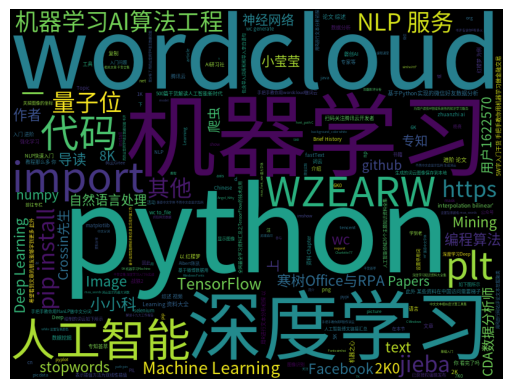

In [3]:
wc.show()

In [5]:
wc.to_file("test.png")

<Figure size 640x480 with 0 Axes>